In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Define the target distribution function
def target_distribution(x, y):
    return (np.sin(x * y)**2 * np.cos(-x * y)**2 * np.exp(-8 * x**2 - 2 * np.abs(y)**3))

# Create a grid of x, y values
x_values = np.linspace(-2, 2, 1000)
y_values = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x_values, y_values)

# Calculate the PDF values for each (x, y) pair
Z = target_distribution(X, Y)

def gauss(x, y):
    return (2 * math.pi)**-1 * np.exp(-(1/2)*(x**2 + y**2))

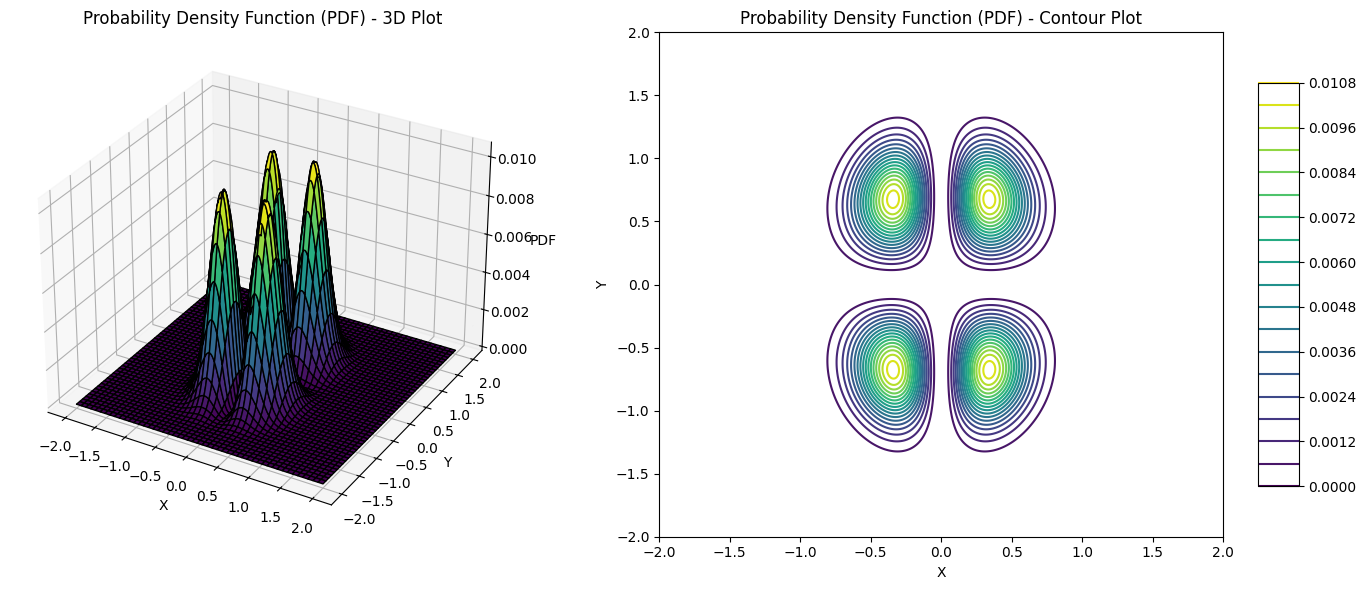

In [34]:
# Create a 3D plot
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121, projection='3d')

# Plot the surface
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Add labels
ax1.set_title('Probability Density Function (PDF) - 3D Plot')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('PDF')

# Create a contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')

# Add labels
ax2.set_title('Probability Density Function (PDF) - Contour Plot')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Add a colorbar
cbar = fig.colorbar(contour, ax=ax2, shrink=0.8, aspect=10)

plt.tight_layout()
plt.show()

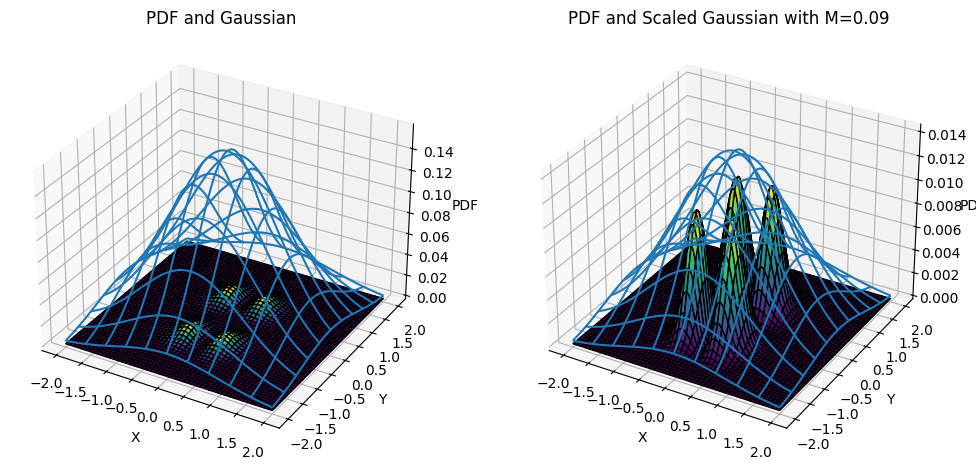

In [35]:
Z2 = gauss(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121, projection='3d')

# Plot the surface
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', label='PDF')
nzm = ax1.plot_wireframe(X, Y, Z2, cmap='viridis', rstride=100, cstride=100, label='Gaussian')

# Add labels
ax1.set_title('PDF and Gaussian')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('PDF')


ax2 = fig.add_subplot(122, projection='3d')

# Plot the surface
surf = ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', label="PDF")
nzm = ax2.plot_wireframe(X, Y, 0.09*Z2, cmap='viridis', rstride=100, cstride=100, label="Gaussian")

# Add labels
ax2.set_title('PDF and Scaled Gaussian with M=0.09')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('PDF')



plt.show()

In [56]:
def rejection_sampling(iterations, gaussian=True):
    samples = []
    reject = []
    for _ in range(iterations):
        # Step 1: Generate a sample from the Gaussian proposal density
        if(gaussian):
            x = np.random.normal(0, 1)
            y = np.random.normal(0, 1)
            acceptance_ratio = target_distribution(x, y) / (0.09*gauss(x, y))
        else:
            x = np.random.uniform(-3, 3)  
            y = np.random.uniform(-3, 3)
            acceptance_ratio = target_distribution(x, y) / (0.04*1/36)

        # Step 3: Accept or reject the sample
        u = np.random.uniform(0, 1)
        if u < acceptance_ratio:
            samples.append((x, y, target_distribution(x, y)))
        else:
            if(gaussian):
                reject.append((x, y, 0.09*gauss(x, y)*u))
            else:
                reject.append((x, y, 0.04*1/36*u))

    return np.array(samples), np.array(reject)


num_samples = 10000

# Generate samples using rejection sampling with Gaussian proposal
samples, rejections = rejection_sampling(num_samples)


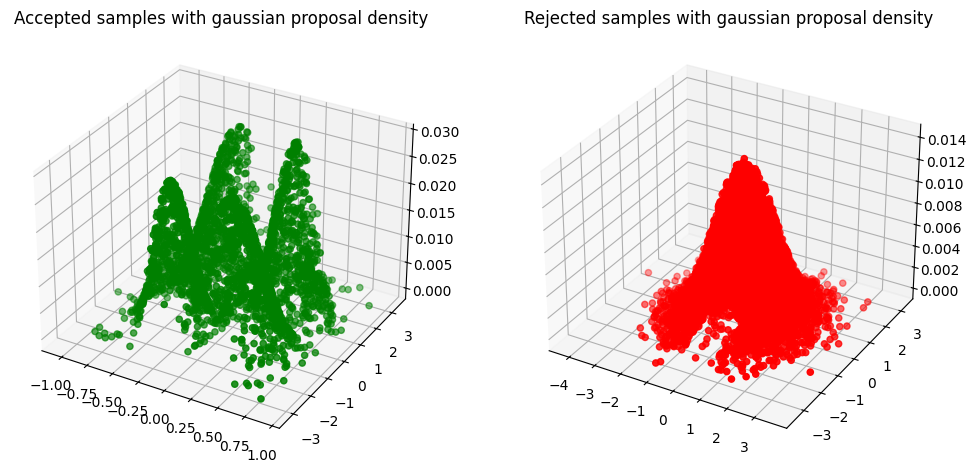

In [58]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(samples[:, 0], samples[:, 1], samples[:, 2], color="g")
plt.title("Accepted samples with gaussian proposal density")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(rejections[:, 0], rejections[:, 1], rejections[:, 2], color="r")
plt.title("Rejected samples with gaussian proposal density")

plt.show()

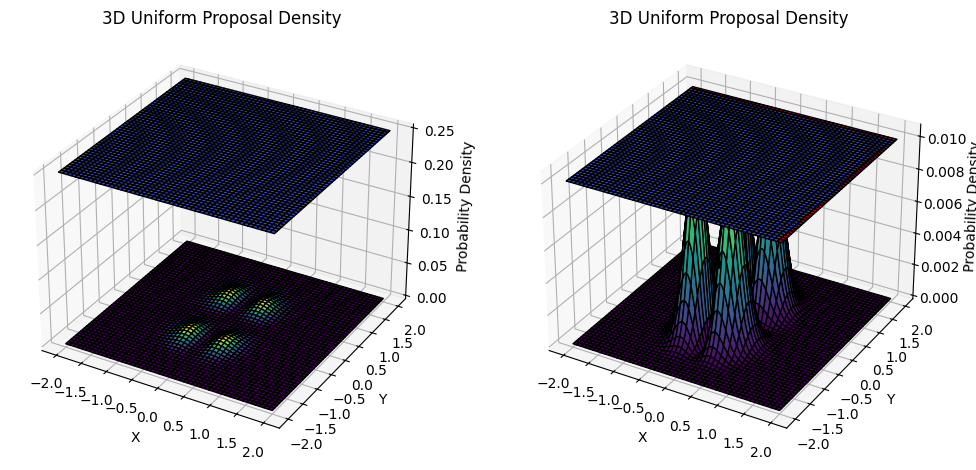

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the uniform distribution
a = -2  # Lower bound
b = 2  # Upper bound


# Calculate the uniform density for each point in the grid
uniform_density = np.ones_like(X) / (b - a)

# Plot the 3D surface plot
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, uniform_density, cmap=plt.cm.coolwarm, edgecolor='k')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', label='PDF')

# Set labels
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probability Density')
ax1.set_title('3D Uniform Proposal Density')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, 0.04*uniform_density, cmap=plt.cm.coolwarm, edgecolor='k')
ax2.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', label='PDF')

# Set labels
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Probability Density')
ax2.set_title('3D Uniform Proposal Density')

plt.show()

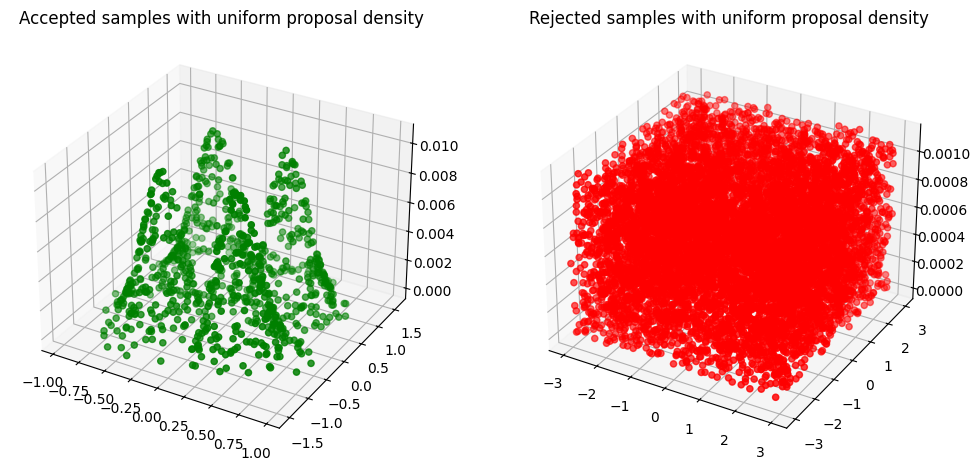

In [39]:
samples, rejections = rejection_sampling(num_samples, False)

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(samples[:, 0], samples[:, 1], target_distribution(samples[:, 0], samples[:, 1]), color="g")
plt.title("Accepted samples with uniform proposal density")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(rejections[:, 0], rejections[:, 1], rejections[:, 2], color="r")
plt.title("Rejected samples with uniform proposal density")

plt.show()

In [40]:
def rejection_sampling_counter(sam_num, gaussian=True):
    samples = []
    reject = []
    iters = 0
    while True:
        # Step 1: Generate a sample from the Gaussian proposal density
        if(gaussian):
            x = np.random.normal(0, 1)
            y = np.random.normal(0, 1)
            acceptance_ratio = target_distribution(x, y) / (0.09*gauss(x, y))
        else:
            x = np.random.uniform(-3, 3)  
            y = np.random.uniform(-3, 3)
            acceptance_ratio = target_distribution(x, y) / (0.04*1/36)

        # Step 3: Accept or reject the sample
        if np.random.uniform(0, 1) < acceptance_ratio:
            samples.append((x, y))
        else:
            reject.append((x, y))
        iters += 1
        if(len(samples) == sam_num):
            break

    return iters

iterations = [100, 1000, 10000]
gauss_iter = []
uniform_iter = []

for i in iterations:
    gauss_iter.append(rejection_sampling_counter(i))
    uniform_iter.append(rejection_sampling_counter(i, False))

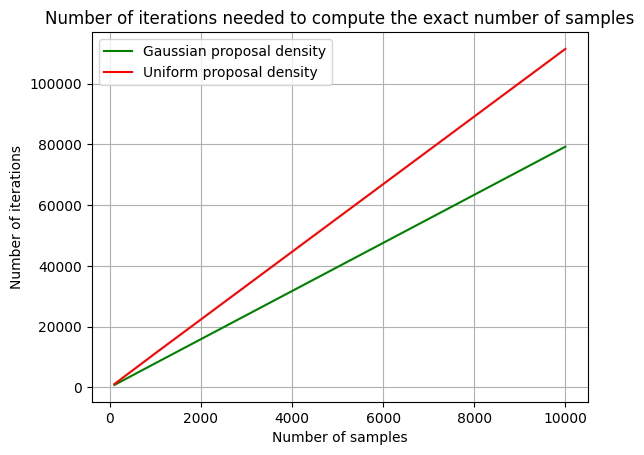

In [41]:
plt.plot(iterations, gauss_iter, color="g", label="Gaussian proposal density")
plt.plot(iterations, uniform_iter, color="r", label="Uniform proposal density")
plt.title("Number of iterations needed to compute the exact number of samples")
plt.xlabel("Number of samples")
plt.ylabel("Number of iterations")
plt.legend()
plt.grid()
plt.show()

# Task 3

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


def plot_post():
    sizes = [10, 50, 100, 500, 1000]
    theta = np.random.rand()
    for s in sizes:
        xs = np.random.choice([0, 1], size=s, p=[1-theta, theta])
        posterior_alpha = 1 + np.sum(xs)
        posterior_beta = 1 + s - np.sum(xs)
        theta_values = np.linspace(0, 1, 1000)
        posterior_distribution = beta.pdf(theta_values, posterior_alpha, posterior_beta)
        plt.plot(theta_values, posterior_distribution, label=f'Posterior (n={s})')
    plt.title(f'Posterior Distribution with theta: {theta}')
    plt.xlabel('Theta')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid()
    plt.show()

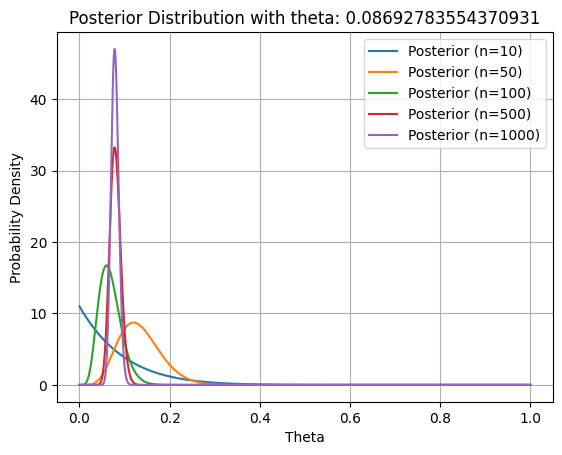

In [61]:
plot_post()

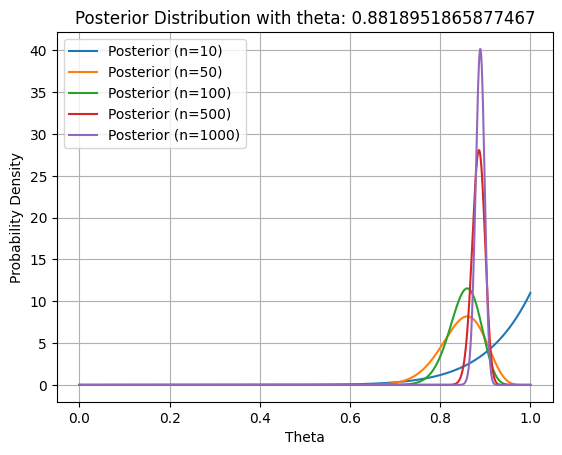

In [64]:
plot_post()

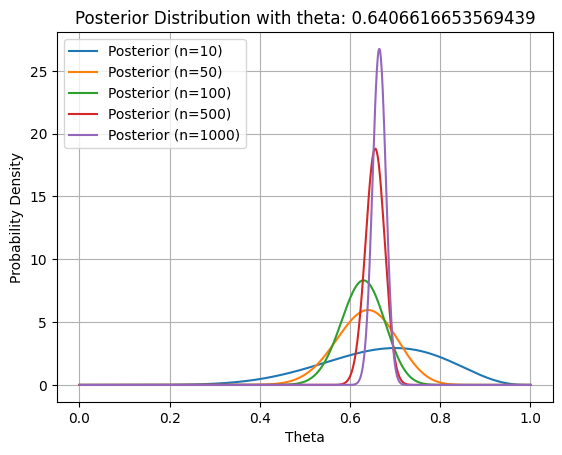

In [65]:
plot_post()